## Dataset: Lig_SiO2

#### **Parameters**: 3x3, grid_eight, 100 series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from pyclustering.nnet.som import type_conn
from matrixprofile import matrixProfile, motifs
# local code
import sys
sys.path.insert(0, os.path.abspath('../src'))
import dtwsom
import random

## 🎲 *Loading data*

## D3011_data = np.load('dataset_TipLig_SiO2.npz')

In [3]:
D3011_data.keys()

KeysView(NpzFile 'dataset_TipLig_SiO2.npz' with keys: verticalTipPosition_m, vDeflection_N, height_m, smoothedMeasuredHeight_m, measuredHeight_m...)

In [4]:
list(D3011_data.keys())

['verticalTipPosition_m',
 'vDeflection_N',
 'height_m',
 'smoothedMeasuredHeight_m',
 'measuredHeight_m',
 'seriesTime_s',
 'time_s']

In [5]:
force_data = D3011_data['vDeflection_N'] * 10**9

In [6]:
force_data.shape

(1024, 800)

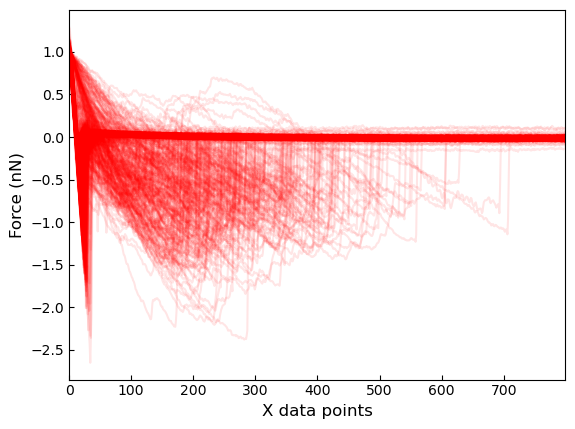

In [7]:
fig,ax = plt.subplots(dpi=100)

for curve in force_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_xlim([0,force_data.shape[1]-1])

#fig.savefig('../data/figures/pca_examples/D3011_curves.png',dpi=300,bbox_inches='tight')

plt.show()

***

## ➗ *Split train and test*

In [8]:
random.seed(1025)

In [9]:
random.shuffle(force_data)
force_data

array([[ 1.1447631e+00,  1.1272272e+00,  1.0832768e+00, ...,
        -6.0450124e-02, -5.7056262e-02, -5.0209076e-02],
       [ 1.1447631e+00,  1.1272272e+00,  1.0832768e+00, ...,
        -6.0450124e-02, -5.7056262e-02, -5.0209076e-02],
       [ 1.1447631e+00,  1.1272272e+00,  1.0832768e+00, ...,
        -6.0450124e-02, -5.7056262e-02, -5.0209076e-02],
       ...,
       [ 9.8341360e-01,  9.7228990e-01,  9.1498820e-01, ...,
         2.9747984e-03,  4.0324380e-04, -5.1568875e-03],
       [ 9.6928390e-01,  9.6973570e-01,  9.0373964e-01, ...,
        -3.2907243e-02, -2.9587634e-02, -2.3985170e-02],
       [ 9.3823370e-01,  8.5344730e-01,  7.8211430e-01, ...,
        -7.5928840e-03, -2.4088327e-03,  1.3712625e-02]])

In [10]:
train_data = force_data[:100]

test_data = force_data[100:]

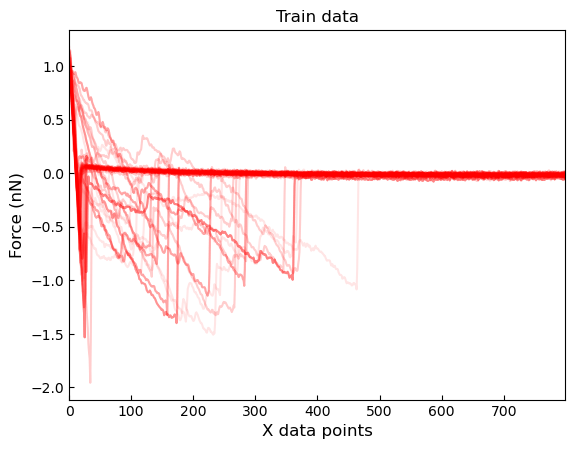

In [11]:
fig,ax = plt.subplots(dpi=100)

for curve in train_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Train data")

ax.set_xlim([0,train_data.shape[1]-1])

plt.show()

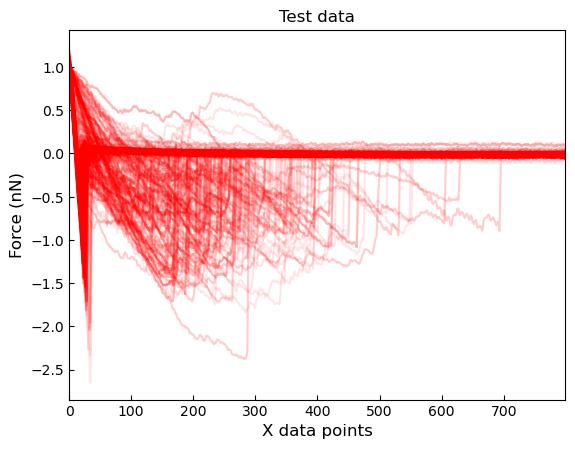

In [12]:
fig,ax = plt.subplots(dpi=100)

for curve in test_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Test data")

ax.set_xlim([0,test_data.shape[1]-1])

plt.show()

***

## 🧬 *Motif discovery with matrix profile*

In [13]:
size = len(train_data[0]) # x data points
sample_size = len(train_data) # rows
print(size, sample_size)

800 100


In [14]:
joined_data = train_data[0]
for i in range(1, len(train_data)):
    joined_data = np.concatenate((joined_data, train_data[i]))
len(joined_data)

80000

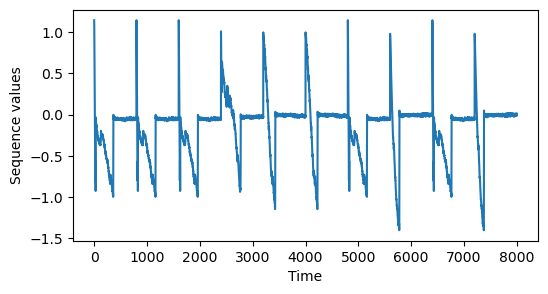

In [15]:
plt.figure(figsize=(6,3))
plt.plot(np.arange(8000), joined_data[:8000])
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

In [16]:
%%time
mp = matrixProfile.stomp(joined_data, size)

CPU times: user 38.8 s, sys: 0 ns, total: 38.8 s
Wall time: 38.8 s


In [17]:
mp 

(array([0.00000000e+00, 1.11510080e-06, 1.11510080e-06, ...,
        1.60393853e-01, 1.46000210e-01, 2.92973655e-05]),
 array([ 1600.,   801.,   802., ..., 31998., 31999., 32000.]))

In [18]:
len(mp)

2

 Matrix Profile: 

In [19]:
mp[0]

array([0.00000000e+00, 1.11510080e-06, 1.11510080e-06, ...,
       1.60393853e-01, 1.46000210e-01, 2.92973655e-05])

In [20]:
len(mp[0])

79201

Index of Matrix Profile:

In [21]:
mp[1]

array([ 1600.,   801.,   802., ..., 31998., 31999., 32000.])

In [22]:
len(mp[1])

79201

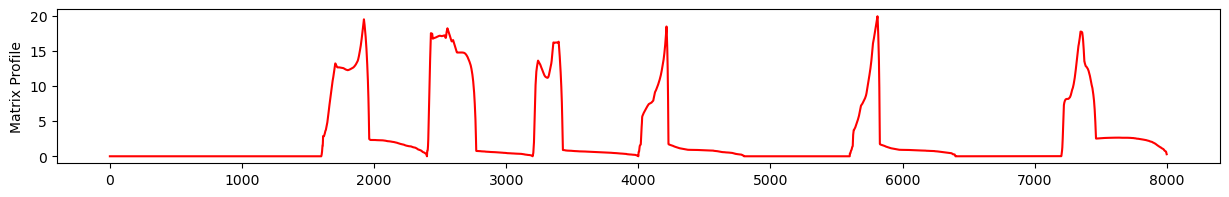

In [23]:
plt.figure(figsize=(15,2))
plt.plot(np.arange(8000), mp[0][:8000], color='red')
plt.ylabel("Matrix Profile")
plt.show()

In [24]:
%%time
mtfs, motif_d  = motifs.motifs(joined_data, mp, max_motifs=1000) # Computes the top k motifs from a matrix profile

CPU times: user 200 ms, sys: 36 ms, total: 236 ms
Wall time: 235 ms


mtfs = motifs (list of lists of indexes representing the motif starting locations)

In [25]:
print(mtfs) # Return the index of the main motif and its main neighbors
print()
print(len(mtfs))

[[np.int64(0), 1600, np.int64(4800), np.int64(6400), np.int64(16000)], [np.int64(3200), 4000, np.int64(19200)], [np.int64(5215), 6815], [np.int64(8000), 16800], [np.int64(9600), np.int64(35200), 44000], [np.int64(10400), np.int64(39200), np.int64(43200)], [np.int64(12000), 52000], [np.int64(14400), 34400], [np.int64(22947), 47747], [np.int64(40000), 68000, np.int64(72000)], [np.int64(42400), 51200], [np.int64(44800), 77600], [np.int64(56000), 67200], [np.int64(60800), 76000], [np.int64(2400), 15200], [np.int64(27200), 36000], [np.int64(13600), np.int64(17600), 20800, np.int64(31200)], [np.int64(30400), 33600], [np.int64(28800), np.int64(45600), np.int64(57600), 64800], [np.int64(24000), np.int64(32800), np.int64(55200), np.int64(56800), 60000, np.int64(76800)], [8800, np.int64(72800)], [22492, np.int64(47292)], [np.int64(12800), 78400], [np.int64(48800), np.int64(58400), 73600], [np.int64(32000), 79200], [np.int64(29600), 38400], [np.int64(40800), 54400], [np.int64(36800), 50400], [np.

motif_d = distances (list of minimum distances for each motif)

In [26]:
print(motif_d)
print()
print(len(motif_d))

[np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(4.76837158203125e-06), np.float64(5.280984981855556e-06), np.float64(6.637292340791251e-06), np.float64(6.809031759974875e-06), np.float64(7.760057786876879e-06), np.float64(7.907449699295521e-06), np.float64(9.377081824870273e-06), np.float64(1.181616044139803e-05), np.float64(1.4954709160678837e-05), np.float64(1.5272054642819114e-05), np.float64(2.4909464948137836e-05), np.float64(2.9297365492450017e-05), np.float64(3.365683818313211e-05), np.float64(3.459894325079639e-05), np.float64(3.792748038752802e-05), np.float64(0.855

In [27]:
motif_center_list = []
for motif in mtfs:
    center_pointers = list(np.arange(motif[0], motif[0]+size)) # Indexes of the central subsequence 
    # each center point start at the starting point of the significant motif (a time serie) and finish at the end of the serie
    motif_center_ts = joined_data[center_pointers] # use the indexes to extract the correspondent sequence in joined_data
    motif_center_list.append(motif_center_ts)

In [28]:
len(motif_center_list) 

44

***

## 🗺️ *SOM Training*

##### How the structure type affect the results? 

*Possibilities* ([Matrix Profile Github](https://github.com/target/matrixprofile-ts)):
1. grid_four ("Standard"): Grid type of connections when each oscillator has connections with left, upper, right, lower neighbors.
2. honeycomb: Grid type of connections when each oscillator has connections with left, upper-left, upper-right, right, right-lower, lower-left neighbors.
3. func_neighbor: Grid type of connections when existance of each connection is defined by the SOM rule on each step of simulation.
4. grid_eight: Grid type of connections when each oscillator has connections with left, upper-left, upper, upper-right, right, right-lower, lower, lower-left neighbors.


In [29]:
%time
rows = 3
cols = 3
structure = type_conn.grid_eight # enumeration of connection types for SOM (inheritance of pyclustering)
network = dtwsom.DtwSom(rows, cols, structure)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [30]:
%%time
network.train(motif_center_list, 50)

Epoch 1 achieved an average quantization error of 0.9686
Epoch 2 achieved an average quantization error of 1.1326
Epoch 3 achieved an average quantization error of 1.1914
Epoch 4 achieved an average quantization error of 1.1986
Epoch 5 achieved an average quantization error of 1.1947
Epoch 6 achieved an average quantization error of 1.2381
Epoch 7 achieved an average quantization error of 1.2984
Epoch 8 achieved an average quantization error of 1.259
Epoch 9 achieved an average quantization error of 1.2279
Epoch 10 achieved an average quantization error of 1.2632
Epoch 11 achieved an average quantization error of 1.2886
Epoch 12 achieved an average quantization error of 1.2957
Epoch 13 achieved an average quantization error of 1.3045
Epoch 14 achieved an average quantization error of 1.3092
Epoch 15 achieved an average quantization error of 1.3069
Epoch 16 achieved an average quantization error of 1.305
Epoch 17 achieved an average quantization error of 1.3063
Epoch 18 achieved an aver

50

***

## *Analysis of the results*

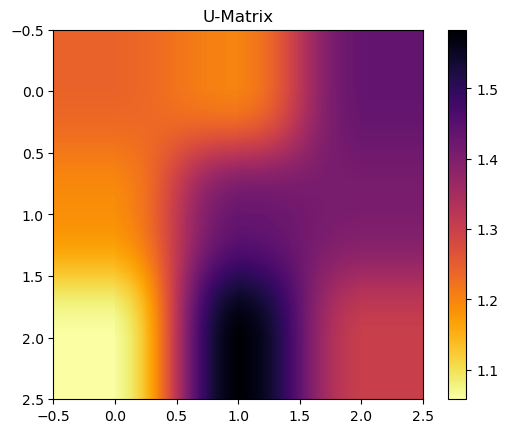

In [31]:
network.show_distance_matrix()

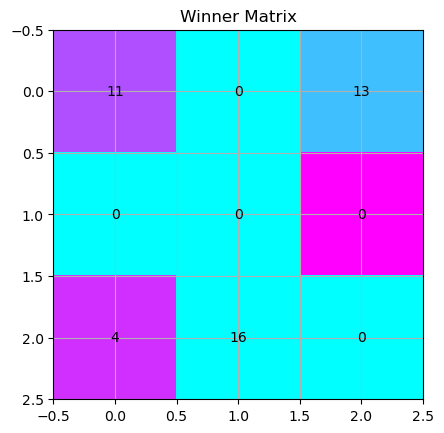

In [32]:
network.show_winner_matrix()

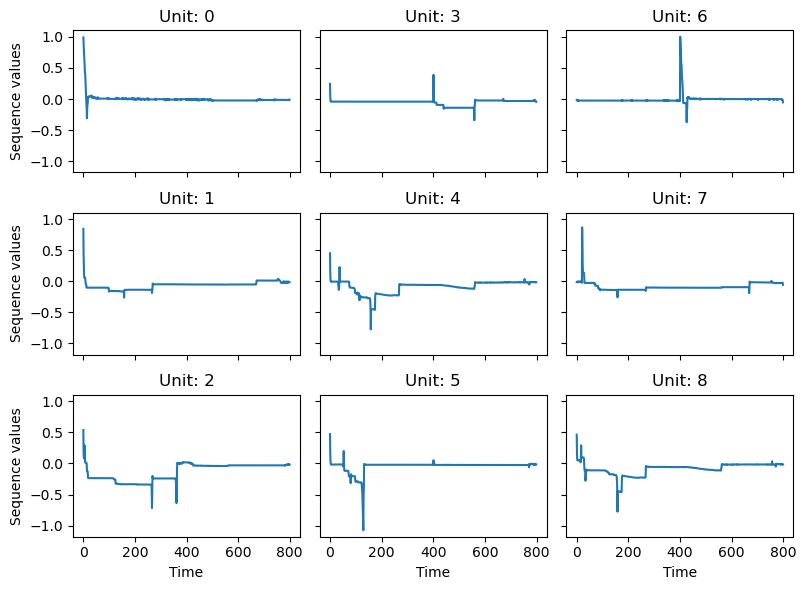

In [33]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(8, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3) # round numbers down to the nearest integer:
    #math.ceil: round a number UP to the nearest integer
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_title("Unit: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Sequence values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

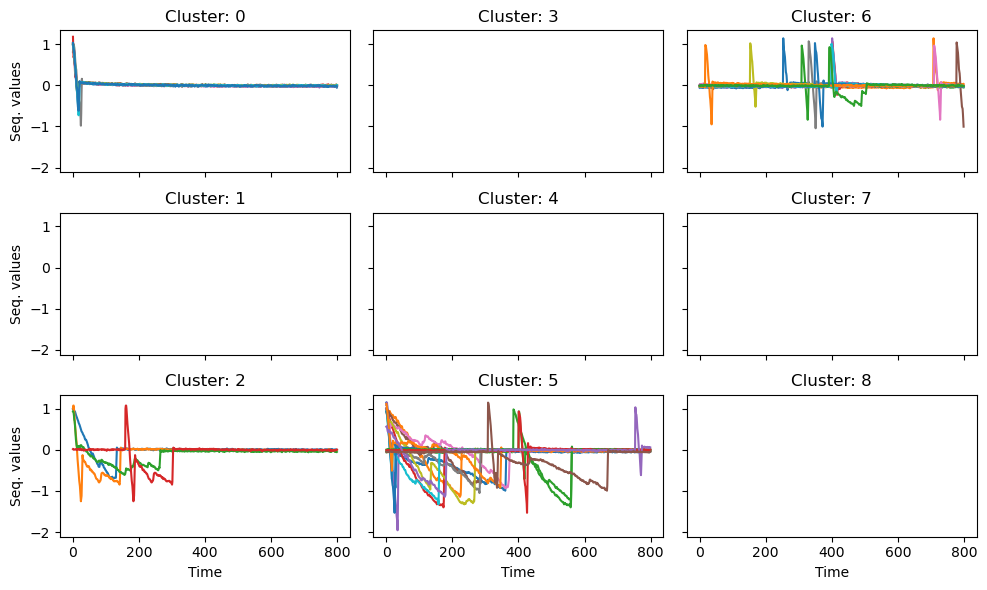

In [34]:
n = rows
n_neurons = network._size
fig, axs = plt.subplots(n,n,figsize=(10, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/n)
    row = neuron_index % n
    cluster_list = network.capture_objects[neuron_index]
    for member_index in cluster_list:
        axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
    axs[row, col].set_title("Cluster: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Seq. values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

### Cluster 5

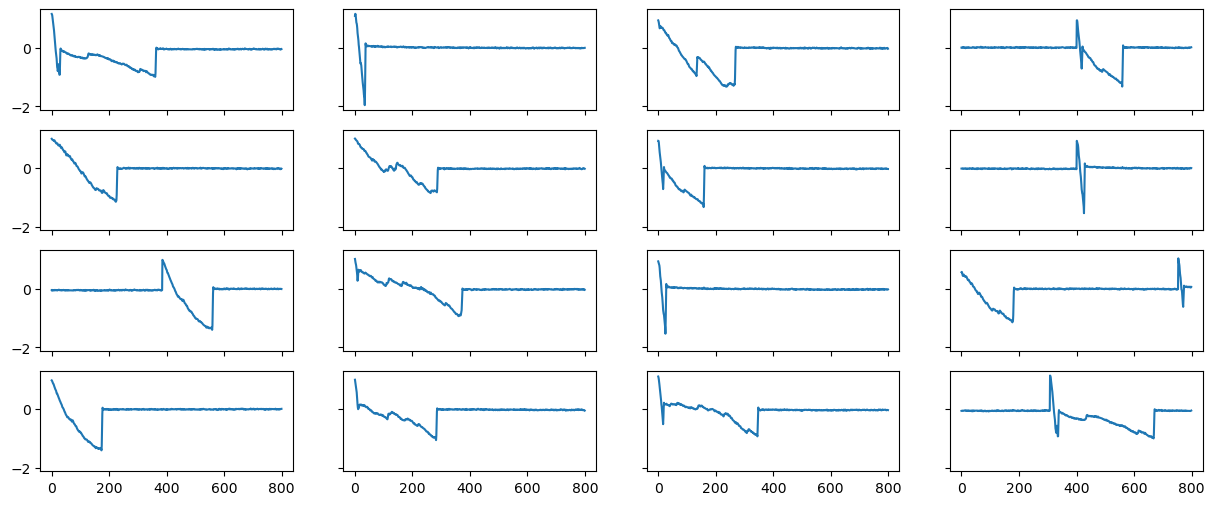

In [37]:
fig, axs = plt.subplots(4,4,figsize=(15, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[5]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/4)
    row = i % 4
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 0

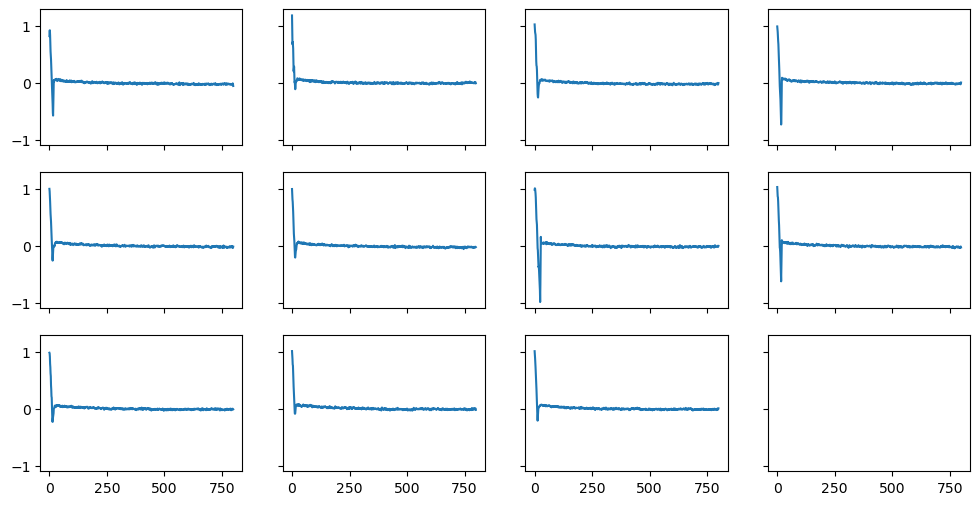

In [45]:
fig, axs = plt.subplots(3,4 ,figsize=(12, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[0]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/3)
    row = i % 3
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 6

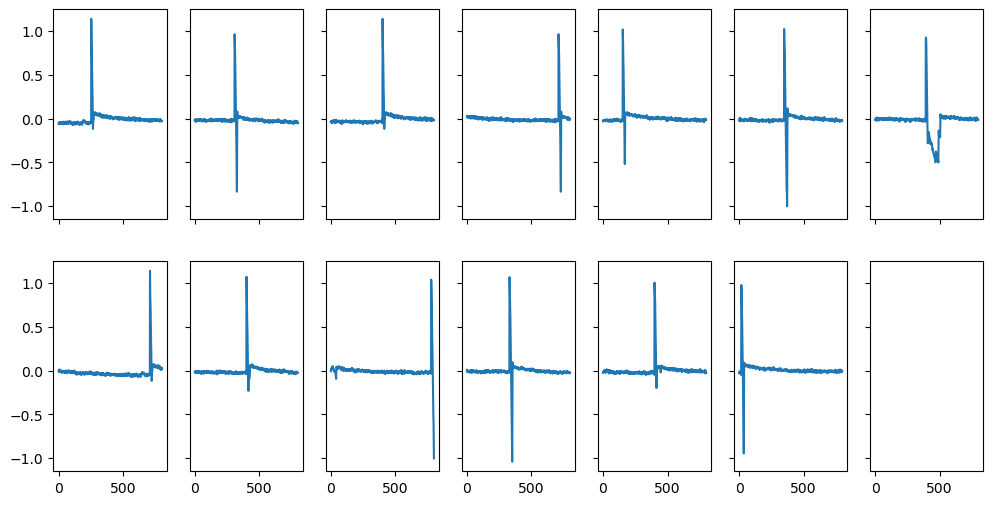

In [39]:
fig, axs = plt.subplots(2,7 ,figsize=(12, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[6]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 2

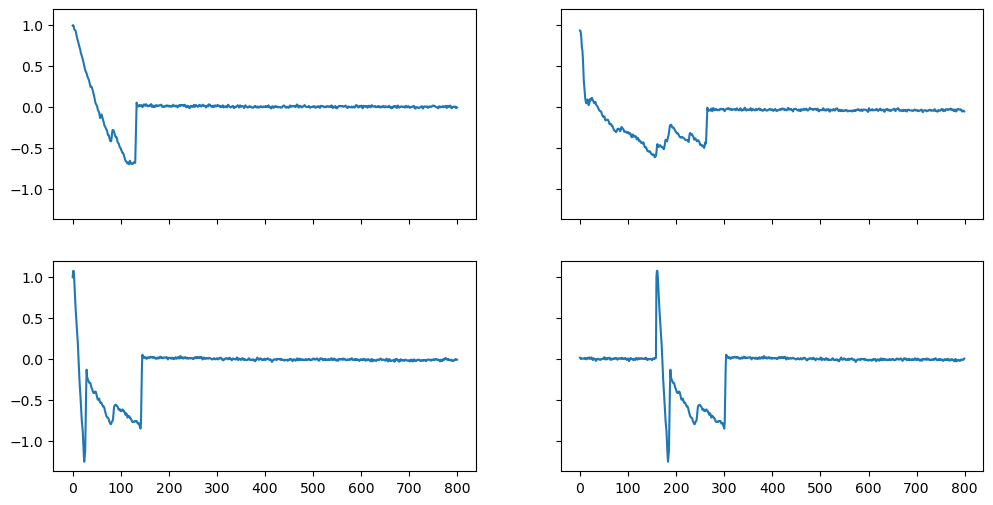

In [44]:
fig, axs = plt.subplots(2,2 ,figsize=(12, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[2]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Pickle and graphics

In [40]:
import pickle

In [42]:
with open("network_lig_sio2.pkl", "wb") as model:
    pickle.dump(network, model)
    model.close()